<a href="https://colab.research.google.com/github/matheustoneti/ecoliproteinclassification/blob/main/Ecoli_Protein_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import cluster
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.datasets.loaders import load_nfl
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv('ecoli.csv', header = None, sep="\s+")

In [6]:
col_names = ["squence_name","mcg","gvh","lip","chg","aac","alm1","alm2","site"]

In [8]:
df.columns = col_names

In [9]:
df.head(10)

,squence_name,mcg,gvh,lip,chg,aac,alm1,alm2,site
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
5,ALKH_ECOLI,0.67,0.39,0.48,0.5,0.36,0.38,0.46,cp
6,AMPD_ECOLI,0.29,0.28,0.48,0.5,0.44,0.23,0.34,cp
7,AMY2_ECOLI,0.21,0.34,0.48,0.5,0.51,0.28,0.39,cp
8,APT_ECOLI,0.20,0.44,0.48,0.5,0.46,0.51,0.57,cp
9,ARAC_ECOLI,0.42,0.40,0.48,0.5,0.56,0.18,0.30,cp


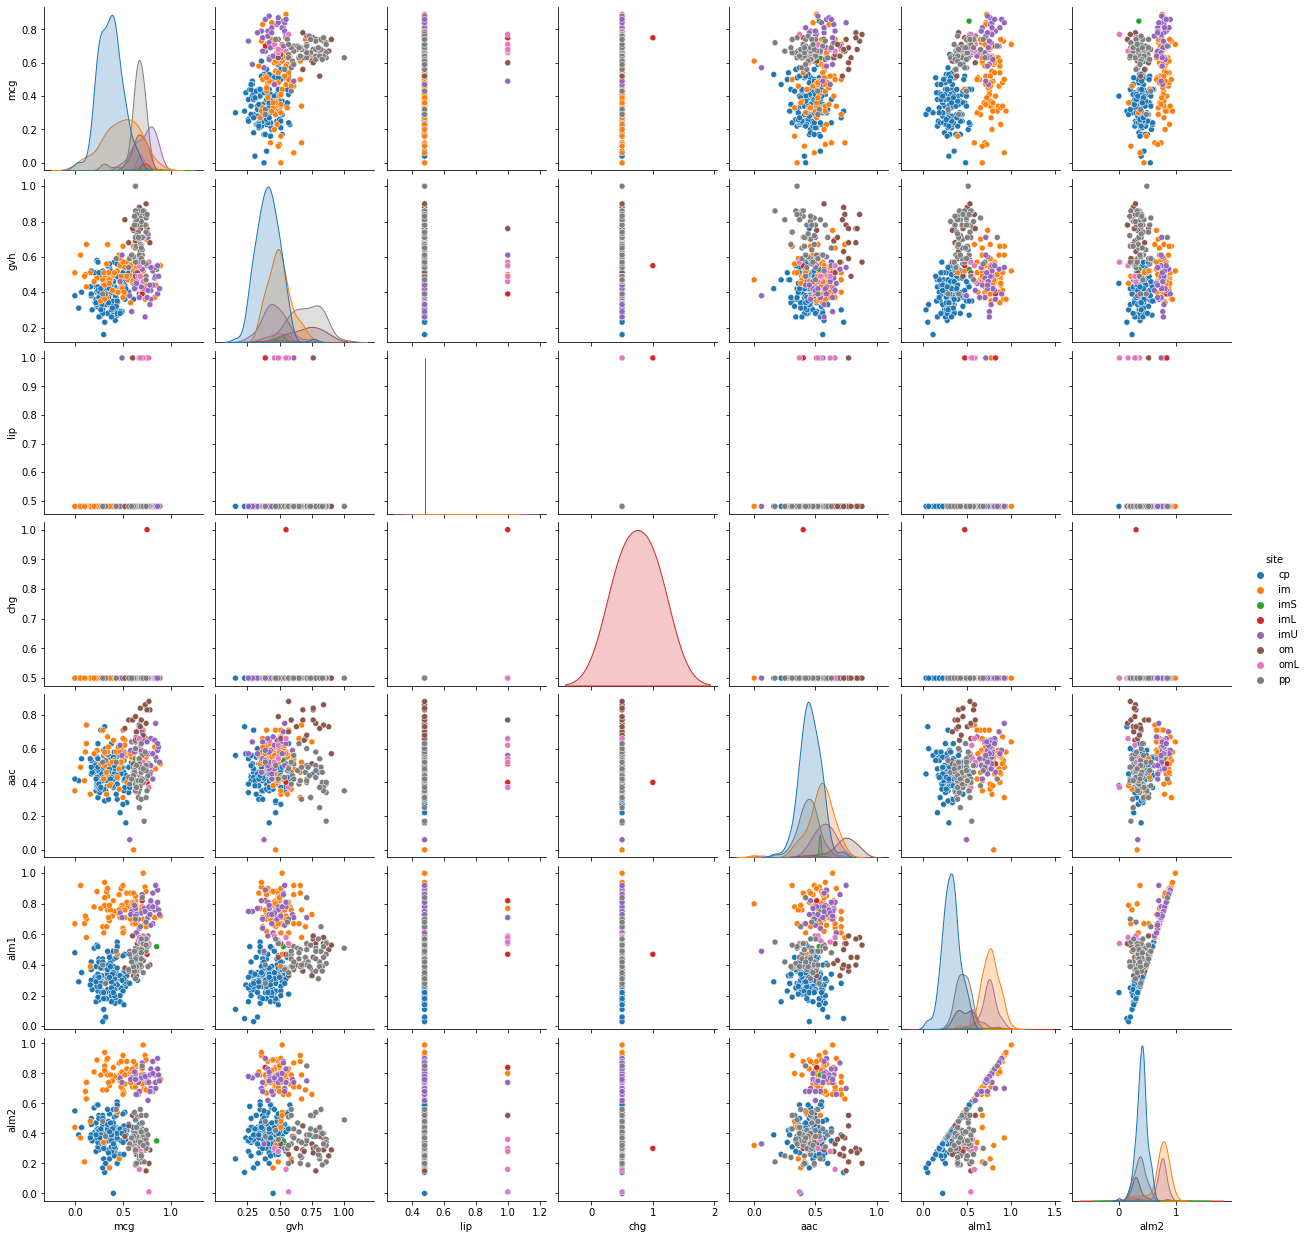

In [11]:
sns.pairplot(df, hue='site')

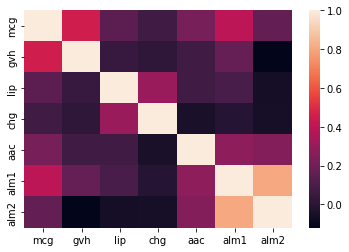

In [12]:
sns.heatmap(df.corr())

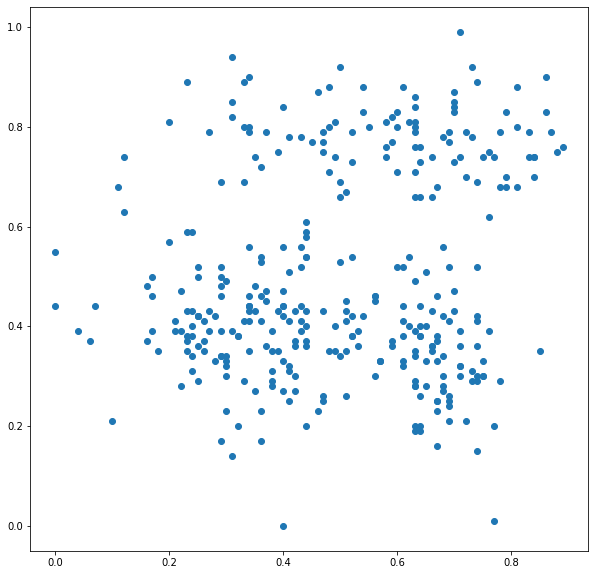

In [21]:
ax, fig = plt.subplots(figsize = (10,10))
ax = plt.scatter(df['mcg'], df['alm2'])

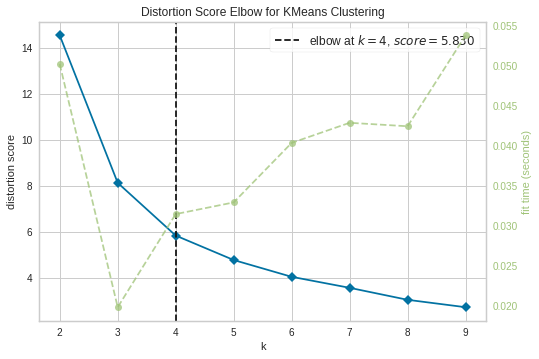

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f22e20d5850>,
                 estimator=KMeans(n_clusters=9, random_state=5), k=(2, 10))

In [25]:
kelbow_visualizer(KMeans(random_state=5), df[['mcg', 'alm2']], k=(2,10))

In [26]:
kmeans = cluster.KMeans(4)

In [28]:
clusters = kmeans.fit_predict(df[['mcg', 'alm2']])

In [29]:
pd.value_counts(clusters)

3    123
0    106
2     63
1     44
dtype: int64

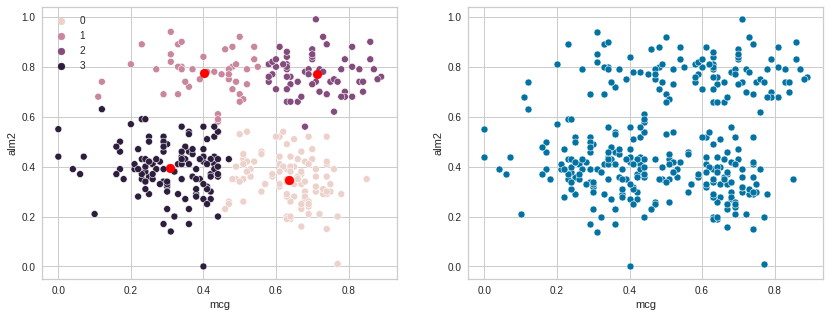

In [30]:
x_center, y_center = kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1]
fig, (axe1,axe2) = plt.subplots(1,2, figsize=(14,5))
sns.scatterplot (data = df, x='mcg', y='alm2', hue= clusters, ax=axe1)
axe1.scatter(x=x_center, y=y_center, s=80, color='red')
sns.scatterplot( data=df, x='mcg', y= 'alm2',  ax=axe2)

In [32]:
df = df.drop(['squence_name'], axis=1)

In [33]:
le = preprocessing.LabelEncoder()

In [34]:
df['site'] = le.fit_transform(df['site'])

In [36]:
df.isnull().sum()

mcg     0
gvh     0
lip     0
chg     0
aac     0
alm1    0
alm2    0
site    0
dtype: int64

In [37]:
y = df['site']
x = df.drop(['site'], axis=1)

In [39]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = (0.3))

In [57]:
modelo = RandomForestClassifier()

In [58]:
modelo = modelo.fit(x_train, y_train)

In [59]:
accuracy = modelo.score(x_test, y_test)

In [60]:
print(accuracy)

0.7920792079207921


In [61]:
prediction = modelo.predict(x_test)
cm = confusion_matrix(prediction, y_test)
cr = classification_report(prediction, y_test)
print(cm)
print(cr)

[[34  1  0  0  1  0  0  1]
 [ 0 20  0  0  5  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  7  0  0  8  0  0  0]
 [ 0  0  0  0  0  6  2  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  0  0  2 12]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        37
           1       0.71      0.80      0.75        25
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.57      0.53      0.55        15
           5       1.00      0.75      0.86         8
           6       0.00      0.00      0.00         0
           7       0.92      0.75      0.83        16

    accuracy                           0.79       101
   macro avg       0.53      0.47      0.49       101
weighted avg       0.85      0.79      0.82       101



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


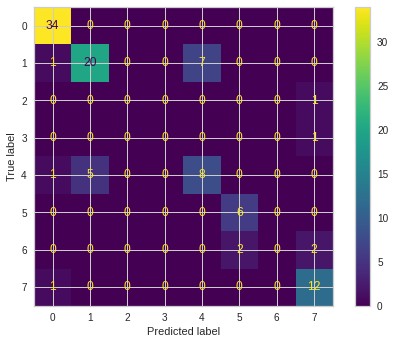

In [63]:
plot_confusion_matrix(modelo, x_test, y_test)